In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
     

In [2]:
df = pd.read_csv("day.csv")

In [3]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


# EDA

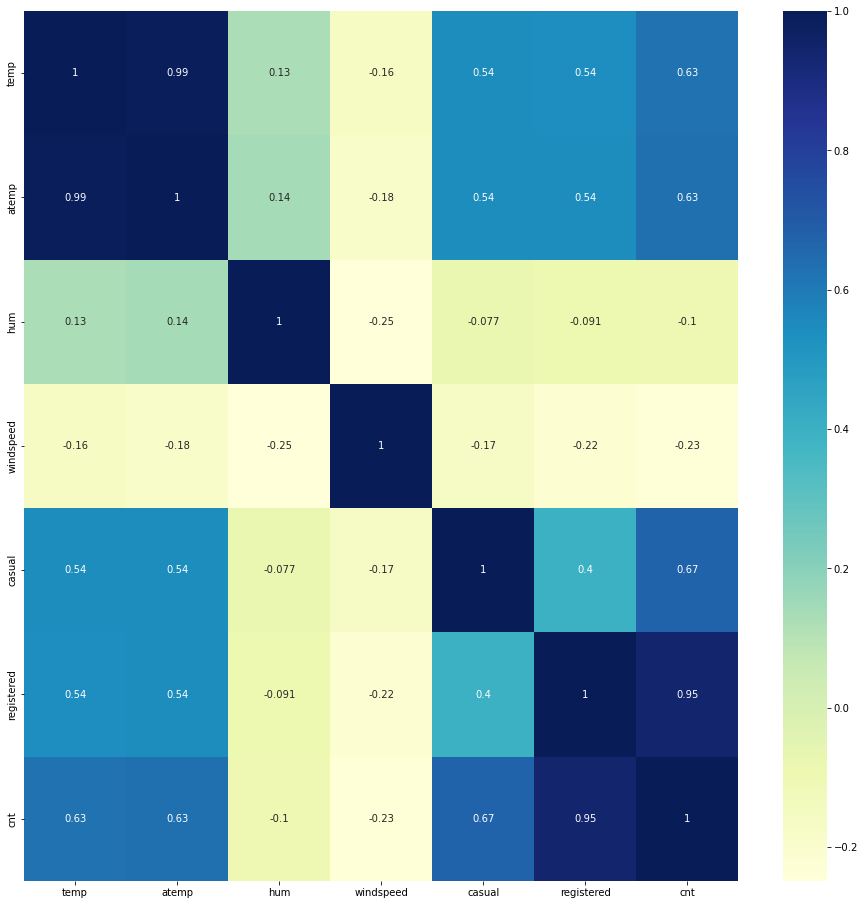

In [6]:

plt.figure(figsize=(16,16))
sns.heatmap(df[['temp','atemp','hum','windspeed','casual','registered','cnt']].corr(), annot=True, cmap="YlGnBu")
plt.show()

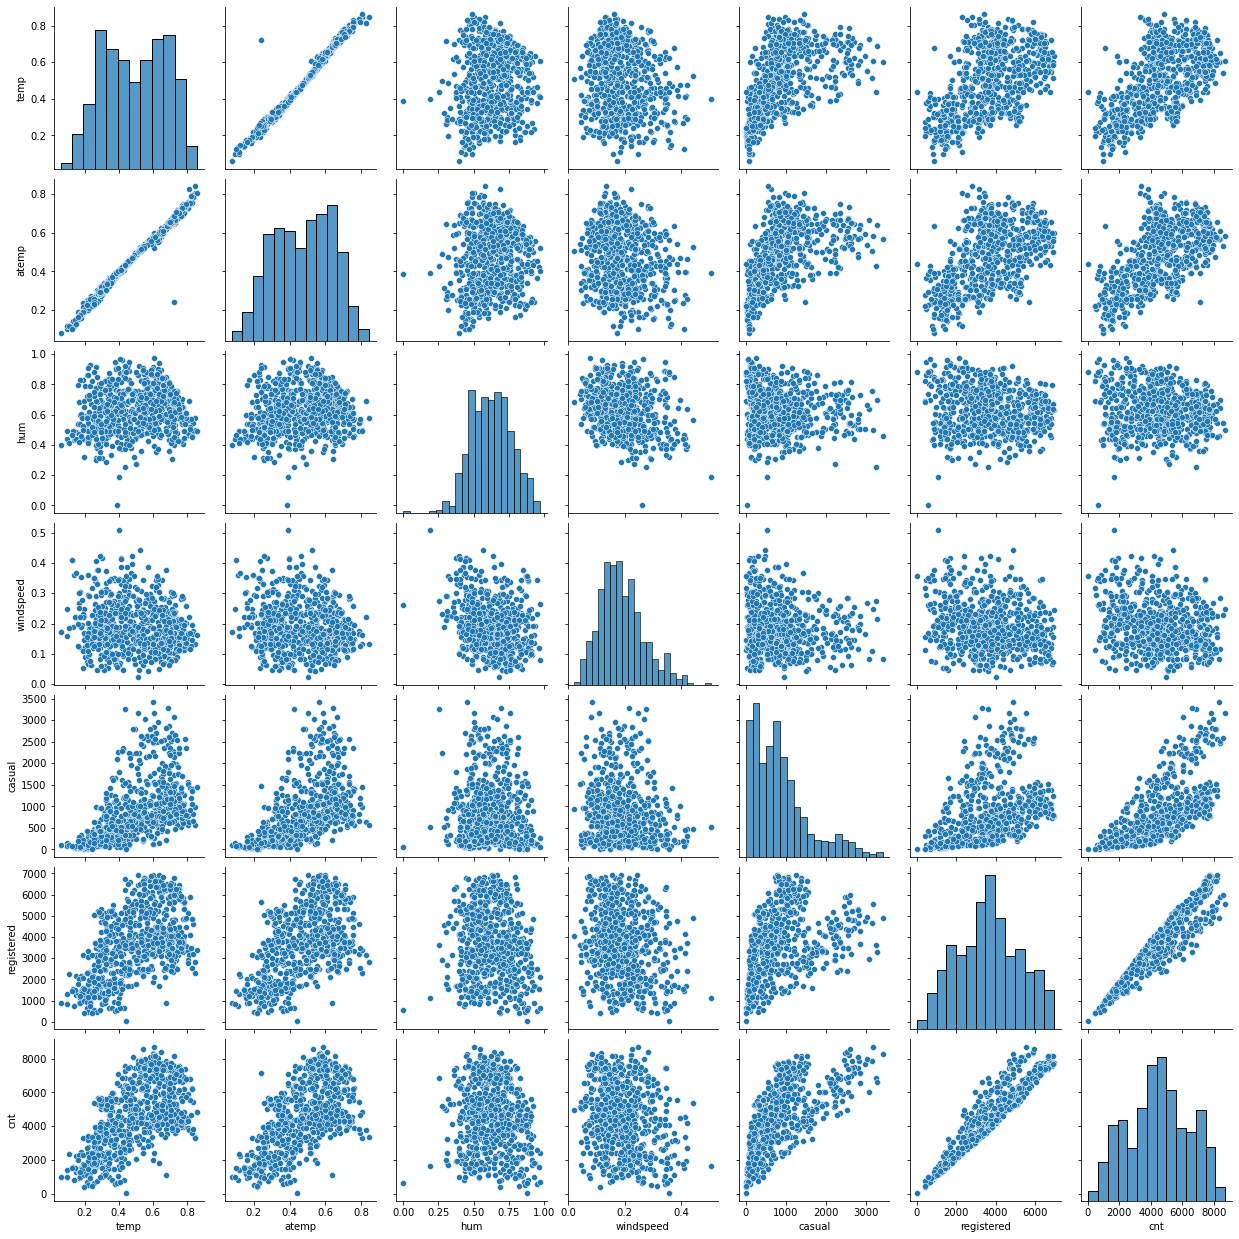

In [7]:
sns.pairplot(df[['temp','atemp','hum','windspeed','casual','registered','cnt']])
plt.show()

# Feature Engineering

In [8]:
# mapping the column

seasons = {1:"spring", 2:"summer", 3:"fall", 4:"winter"}
df['season'] = df['season'].map(seasons)

df['yr'] = df['yr'].map({0:'2018', 1:'2019'})
df['yr'].value_counts()

weathers = {1:'Clear',2:'Misty',3:'Snowy',4:'Rainy'}
df['weathersit'] = df['weathersit'].map(weathers)

months = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',\
         10:'October',11:'November',12:'December'}
df['mnth'] = df['mnth'].map(months)

weekdays = {0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
df['weekday'] = df['weekday'].map(weekdays)

In [9]:
# drop the instance column as it is redundant
df = df.drop('instant',axis=1)

In [10]:
# dropping dteday as it is redundant also
df = df.drop('dteday', axis=1)

In [11]:
# cnt column is the sum of casual + registered columns
# so we will remove one of the columns casual or registered as they are redundant
df = df.drop(['casual'], axis=1)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,registered,cnt
0,spring,2018,January,0,Saturday,0,Misty,0.344167,0.363625,0.805833,0.160446,654,985
1,spring,2018,January,0,Sunday,0,Misty,0.363478,0.353739,0.696087,0.248539,670,801
2,spring,2018,January,0,Monday,1,Clear,0.196364,0.189405,0.437273,0.248309,1229,1349
3,spring,2018,January,0,Tuesday,1,Clear,0.200000,0.212122,0.590435,0.160296,1454,1562
4,spring,2018,January,0,Wednesday,1,Clear,0.226957,0.229270,0.436957,0.186900,1518,1600


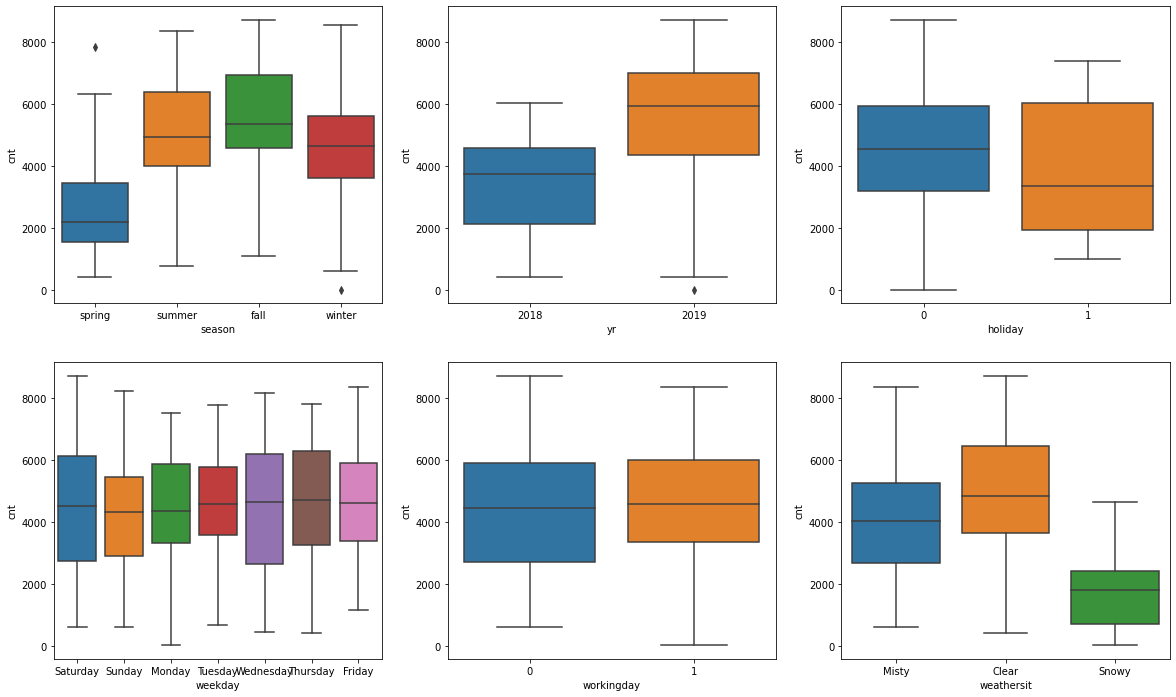

In [12]:
# visualizing through boxplot
plt.figure(figsize = (20,12))
plt.subplot(2,3,1)
sns.boxplot(x=df['season'],y=df['cnt'])

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=df)

plt.subplot(2,3,3)
sns.boxplot(x='holiday',y='cnt',data=df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=df)
plt.show()

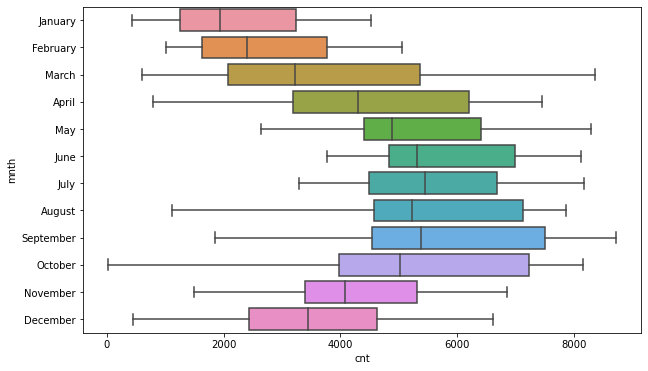

In [13]:

plt.figure(figsize = (10,6))
sns.boxplot(y='mnth',x='cnt',data=df)
plt.show()

In [14]:

season_dummy = pd.get_dummies(df['season'], drop_first=True) #dropfirst to prevent multicollinearity
yr_dummy = pd.get_dummies(df['yr'], drop_first=True)
month_dummy = pd.get_dummies(df['mnth'], drop_first=True)
weekday_dummy = pd.get_dummies(df['weekday'], drop_first=True)
weather_dummy = pd.get_dummies(df['weathersit'], drop_first=True)
status = pd.concat([season_dummy,yr_dummy,month_dummy,weekday_dummy,weather_dummy], axis=1)
df = pd.concat([df,status], axis=1)
df = df.drop(['season','yr','mnth','weekday','weathersit'], axis=1)
df.head(25)
     

,holiday,workingday,temp,atemp,hum,windspeed,registered,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Misty,Snowy
0,0,0,0.344167,0.363625,0.805833,0.160446,654,985,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0.363478,0.353739,0.696087,0.248539,670,801,1,0,...,0,0,0,0,1,0,0,0,1,0
2,0,1,0.196364,0.189405,0.437273,0.248309,1229,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,0.200000,0.212122,0.590435,0.160296,1454,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0.226957,0.229270,0.436957,0.186900,1518,1600,1,0,...,0,0,0,0,0,0,0,1,0,0
5,0,1,0.204348,0.233209,0.518261,0.089565,1518,1606,1,0,...,0,0,0,0,0,1,0,0,0,0
6,0,1,0.196522,0.208839,0.498696,0.168726,1362,1510,1,0,...,0,0,0,0,0,0,0,0,1,0
7,0,0,0.165000,0.162254,0.535833,0.266804,891,959,1,0,...,0,0,0,1,0,0,0,0,1,0
8,0,0,0.138333,0.116175,0.434167,0.361950,768,822,1,0,...,0,0,0,0,1,0,0,0,0,0
9,0,1,0.150833,0.150888,0.482917,0.223267,1280,1321,1,0,...,0,0,1,0,0,0,0,0,0,0


In [15]:
df.shape

(731, 31)

# Model Building

In [16]:

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.7, random_state=20)
print(df_train.shape)
print(df_test.shape)

(511, 31)
(220, 31)


# Standardization

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # instance of the MinMaxScaler

# numerical variables to scale:
num_vars = ['temp','atemp','hum','windspeed','registered','cnt']


# scaling the num vars of the training data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

     

,holiday,workingday,temp,atemp,hum,windspeed,registered,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Misty,Snowy
260,0,0,0.537125,0.527854,0.714653,0.390961,0.383614,0.463962,0,0,...,0,1,0,0,1,0,0,0,0,0
202,0,1,0.982573,1.000000,0.596830,0.277290,0.368913,0.356876,0,0,...,0,0,0,0,0,0,0,0,0,0
317,0,1,0.566531,0.573774,0.603684,0.711845,0.532159,0.489557,0,0,...,0,0,1,0,0,0,0,0,0,0
473,0,1,0.479401,0.482711,0.585262,0.364484,0.551914,0.475190,0,1,...,0,0,0,0,0,0,0,1,1,0
431,0,1,0.402074,0.385767,0.527849,0.809986,0.622971,0.541470,1,0,...,0,0,0,0,0,0,0,1,0,0


In [18]:

y_train = df_train.pop('cnt')
X_train = df_train

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

# Running RFE with output no of variables equal to 15
rfe = RFE(lm, n_features_to_select=15,step= 1)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [20]:

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('holiday', False, 6),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 14),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('registered', True, 1),
 ('spring', False, 13),
 ('summer', True, 1),
 ('winter', True, 1),
 ('2019', False, 8),
 ('August', True, 1),
 ('December', False, 2),
 ('February', True, 1),
 ('January', True, 1),
 ('July', True, 1),
 ('June', True, 1),
 ('March', False, 16),
 ('May', False, 12),
 ('November', False, 7),
 ('October', True, 1),
 ('September', False, 15),
 ('Monday', False, 11),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 4),
 ('Tuesday', False, 5),
 ('Wednesday', False, 3),
 ('Misty', False, 9),
 ('Snowy', False, 10)]

In [21]:
# list of significant columns
cols = X_train.columns[rfe.support_]
cols

Index(['workingday', 'temp', 'hum', 'windspeed', 'registered', 'summer',
       'winter', 'August', 'February', 'January', 'July', 'June', 'October',
       'Saturday', 'Sunday'],
      dtype='object')

In [22]:

# list of insignificant columns
X_train.columns[~rfe.support_]

Index(['holiday', 'atemp', 'spring', '2019', 'December', 'March', 'May',
       'November', 'September', 'Monday', 'Thursday', 'Tuesday', 'Wednesday',
       'Misty', 'Snowy'],
      dtype='object')

In [23]:
X_train_rfe = X_train[cols]

## Building the model using statsmodels for detailed statistics Manually selecting the features from now on (Fine tuning)

In [24]:
import statsmodels.api as sm

In [25]:

# adding the constant to the X_train dataset otherwise it will fit the line through the origin by default
X_train_new = sm.add_constant(X_train_rfe) 
#adds a constant column of 1 to the dataset which acts as the bias and help us to move the regression line up or down such that residual errors are zero.

X_train_new.head()

,const,workingday,temp,hum,windspeed,registered,summer,winter,August,February,January,July,June,October,Saturday,Sunday
260,1.0,0,0.537125,0.714653,0.390961,0.383614,0,0,0,0,0,0,0,0,0,1
202,1.0,1,0.982573,0.596830,0.277290,0.368913,0,0,0,0,0,1,0,0,0,0
317,1.0,1,0.566531,0.603684,0.711845,0.532159,0,1,0,0,0,0,0,0,0,0
473,1.0,1,0.479401,0.585262,0.364484,0.551914,1,0,0,0,0,0,0,0,0,0
431,1.0,1,0.402074,0.527849,0.809986,0.622971,0,0,0,0,0,0,0,0,0,0


In [26]:
# Checking the existing model statistics
lr = sm.OLS(y_train, X_train_new).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     949.1
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:45:35   Log-Likelihood:                 886.10
No. Observations:                 511   AIC:                            -1740.
Df Residuals:                     495   BIC:                            -1672.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0994      0.018      5.477      0.000       0.064       0.135
workingday    -0.0919      0.012     -7.864      0.000      -0.115      -0.069
temp           0.1371      0.017      8.137      0.000       0.104       0.170
hum           -0.0708      0.015     -4.721      0.000      -0.100      -0.041
windspeed     -0.0430      0.011     -3.942      0.000      -0.064      -0.022
registered     0.9051      0.012     77.851      0.000       0.882       0.928
summer         0.0166      0.006      2.718      0.007       0.005       0.029
winter        -0.0244      0.007     -3.365      0.001      -0.039      -0.010
August        -0.0207      0.009     -2.216      0.027      -0.039      -0.002
February      -0.0233      0.009     -2.611      0.009      -0.041      -0.006
January       -0.0145      0.010     -1.459      0.145      -0.034       0.005
July          -0.0228      0.010     -2.305      0.022      -0.042      -0.003
June          -0.0266      0.009     -3.091      0.002      -0.044      -0.010
October        0.0232      0.009      2.687      0.007       0.006       0.040
Saturday       0.0375      0.012      3.043      0.002       0.013       0.062
Sunday         0.0217      0.013      1.726      0.085      -0.003       0.047
==============================================================================
Omnibus:                       78.994   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.702
Skew:                           0.842   Prob(JB):                     2.33e-37
Kurtosis:                       5.255   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
     

,Features,VIF
1,temp,24.41
2,hum,19.81
0,workingday,17.00
4,registered,10.43
3,windspeed,5.65
13,Saturday,4.43
14,Sunday,3.50
6,winter,3.27
5,summer,2.64
10,July,2.28


Working day, saturday, sunday have a high VIF July has a high p Value so dropping July from the dataset.

In [29]:
#model 2 
X_train_rfe2 = X_train_rfe.drop('July', axis=1)
X_train_new2 = sm.add_constant(X_train_rfe2)

# Checking the existing model statistics
lr2 = sm.OLS(y_train, X_train_new2).fit()
print(lr2.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     1008.
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:47:00   Log-Likelihood:                 883.37
No. Observations:                 511   AIC:                            -1737.
Df Residuals:                     496   BIC:                            -1673.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0970      0.018      5.331      0.0

,Features,VIF
2,hum,18.90
0,workingday,16.90
1,temp,16.57
4,registered,10.18
3,windspeed,5.60
12,Saturday,4.41
13,Sunday,3.50
6,winter,3.20
5,summer,2.23
8,February,1.57


In [30]:

#drop working day as it has high vif indicating high multicollinearity
#model 3 
X_train_rfe3 = X_train_rfe2.drop('workingday', axis=1)
X_train_new3 = sm.add_constant(X_train_rfe3)

# Checking the existing model statistics
lr3 = sm.OLS(y_train, X_train_new3).fit()
print(lr3.summary())

vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     961.7
Date:                Sat, 05 Aug 2023   Prob (F-statistic):               0.00
Time:                        15:47:13   Log-Likelihood:                 853.09
No. Observations:                 511   AIC:                            -1678.
Df Residuals:                     497   BIC:                            -1619.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0133      0.016      0.848      0.3

,Features,VIF
0,temp,16.56
1,hum,13.04
3,registered,8.72
2,windspeed,4.73
5,winter,3.19
4,summer,2.23
8,January,1.53
7,February,1.52
10,October,1.50
6,August,1.46


In [31]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

#perform Bresuch-Pagan test  Null = homoskedasticity present 
                            #alternate - heteroskedasticity  
names = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(lr3.resid, lr3.model.exog)

lzip(names, test)

# p value < 0.05  null hypothesis is rejected.

[('Lagrange multiplier statistic', 72.64034212442601),
 ('p-value', 2.61168066047857e-10),
 ('f-value', 6.3352001186918505),
 ('f p-value', 3.969680879366896e-11)]

### All VIFS are less than 10 and also all p values are less than 0.05

### Analysis on train data

In [32]:

y_train_pred = lr3.predict(X_train_new3)

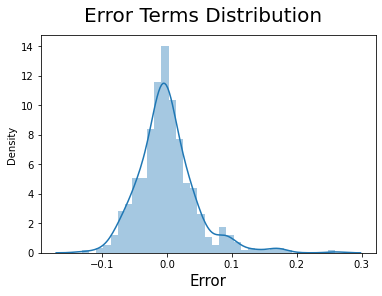

In [33]:

fig = plt.figure()
sns.distplot(y_train - y_train_pred)
plt.xlabel('Error', fontsize=15)
fig.suptitle("Error Terms Distribution", fontsize=20)
plt.show()

In [34]:

# columns of the final model
X_train_rfe3.columns

Index(['temp', 'hum', 'windspeed', 'registered', 'summer', 'winter', 'August',
       'February', 'January', 'June', 'October', 'Saturday', 'Sunday'],
      dtype='object')

In [35]:
# transforming the test dataset
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,registered,cnt,spring,summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Misty,Snowy
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.027273,0.668182,0.519234,0.504701,0.638794,0.413094,0.493766,0.488042,0.290909,0.213636,...,0.104545,0.072727,0.131818,0.109091,0.195455,0.113636,0.200000,0.113636,0.350000,0.018182
std,0.163248,0.471940,0.244035,0.222003,0.139915,0.201095,0.247392,0.235689,0.455217,0.410808,...,0.306665,0.260281,0.339064,0.312464,0.397455,0.318093,0.400912,0.318093,0.478057,0.133913
min,0.000000,0.000000,-0.048868,-0.026641,0.193231,0.070100,-0.060643,-0.049378,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.309499,0.322575,0.537704,0.262668,0.318568,0.342297,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.502273,0.501032,0.643316,0.386287,0.498392,0.494145,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.730987,0.683977,0.727721,0.510125,0.649311,0.676174,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.964059,0.937920,0.966134,1.214955,0.995559,0.957503,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
y_test = df_test.pop('cnt')
     

In [37]:

# dropping insignificant columns in test set
X_test = df_test[X_train_rfe3.columns]

In [38]:
X_test.head()

,temp,hum,windspeed,registered,summer,winter,August,February,January,June,October,Saturday,Sunday
283,0.614452,0.831620,0.302192,0.532925,0,1,0,0,0,0,1,0,0
453,0.519699,0.451586,0.744541,0.747779,1,0,0,0,0,0,0,0,0
266,0.666730,0.886889,0.140242,0.494793,0,1,0,0,0,0,0,1,0
269,0.705938,0.910454,0.239898,0.494181,0,1,0,0,0,0,0,0,0
120,0.464154,0.783633,0.210300,0.275191,1,0,0,0,0,0,0,0,1


In [40]:
# adding constant in X_test
X_test_new = sm.add_constant(X_test)

In [41]:
# using model lr3 to make predictions
y_pred = lr3.predict(X_test_new)

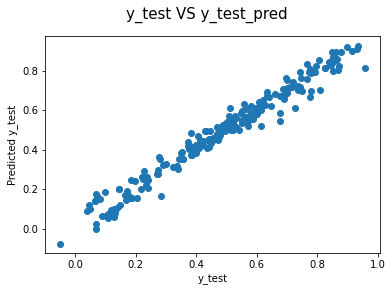

In [42]:

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test VS y_test_pred', fontsize=15)
plt.xlabel('y_test',fontsize=10)
plt.ylabel('Predicted y_test',fontsize=10)
plt.show()
     

In [43]:

from sklearn.metrics import r2_score

R2 = r2_score(y_test ,y_pred)
R2

0.968142589133238